In [3]:
import numpy as np
import pickle
from matplotlib import pyplot as plt 

In [1]:
var_PCA = '/work/forkert_lab/erik/PCA/slices-z'
var_HPCA = '/work/forkert_lab/erik/PCA3D/HPCA'
var_PCA_sklearn = '/work/forkert_lab/erik/PCA/slices-z-sklearn'

In [9]:
PCA_evalues = []
for z_slice in range(41,141):
    with open(var_PCA + '/evalues_slice_{}.pkl'.format(z_slice),'rb') as f:  
        PCA_evalues.append(pickle.load(f))

In [10]:
PCA_evalues_sklearn = []
for z_slice in range(41,42):
    PCA_evalues_sklearn.append(np.load(var_PCA_sklearn + '/evalues_slice_{}.npy'.format(z_slice)))

In [34]:
PCA_evalues[0][-0:].sum()/PCA_evalues[0][:].sum()

1.0

In [29]:
PCA_evalues[0][-4]

107862.16

In [22]:
PCA_evalues_sklearn[0][4].sum()

0.023359459

In [37]:
with open(var_PCA + '/evecs_slice_41.pkl','rb') as f:  
    PCA_evec41 = pickle.load(f)

In [39]:
with open(var_PCA_sklearn + '/evecs_slice_41.pkl','rb') as f:  
    PCA_evec_41_sklearn = pickle.load(f)

In [40]:
PCA_evec41.shape

(22500, 22500)

In [41]:
PCA_evec_41_sklearn.shape

(18953, 22500)

In [98]:
PCA_evec_41_sklearn[9].sum()

10.235299

In [89]:
PCA_evec41[:,0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [66]:
PCA_evec41[2,:].sum()

1.0

In [7]:
HPCA_evalues = np.load(var_HPCA + '/variance_evecs_HPCA_1000_18000_3D_41_14.npy')

In [33]:
HPCA_evalues[:1000].sum()

0.0

In [35]:
PCA_variance = []
for evalue_slice in PCA_evalues:
    slice_variance = []
    for evecs in range(500,6000,500):
        slice_variance.append(evalue_slice[-evecs:].sum()/evalue_slice[:].sum())
    slice_variance = np.array(slice_variance)
    PCA_variance.append(slice_variance)

In [15]:
HPCA_variance = []

for evecs in range(0,18000,500):
    HPCA_variance.append(HPCA_evalues[:evecs].sum())
    
HPCA_variance = np.array(HPCA_variance)

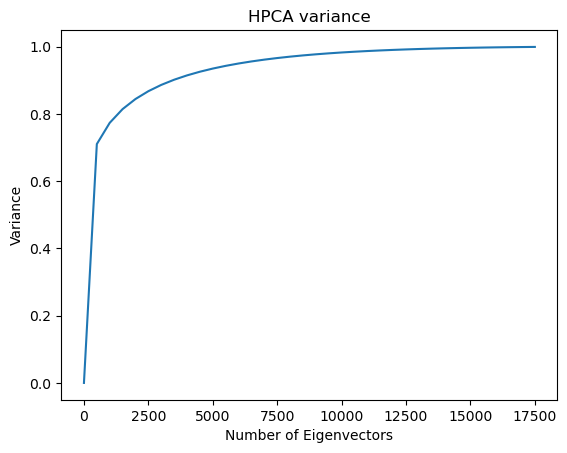

In [24]:
plt.title("HPCA variance") 
plt.xlabel("Number of Eigenvectors") 
plt.ylabel("Variance") 
plt.plot(np.arange(0,18000,500),HPCA_variance)
plt.show()

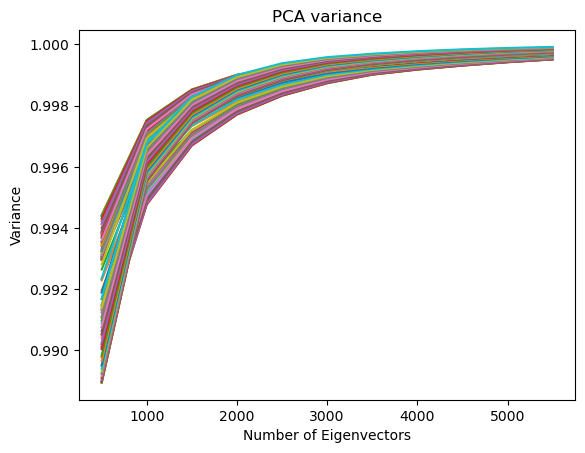

In [36]:
plt.title("PCA variance") 
plt.xlabel("Number of Eigenvectors") 
plt.ylabel("Variance") 
initial_slice = 41
for PCA_variance_slice in PCA_variance:
    plt.plot(np.arange(500,6000,500),PCA_variance_slice)
    initial_slice += 1
plt.show()